In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import skfuzzy as fuzz

warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('df2.csv')
pd.set_option('display.max_row',data.shape[0])
pd.set_option('display.max_column',data.shape[1]) 
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine,C/S,c-CS-m


In [13]:
exploitable = data.columns[data.isna().sum()/data.shape[0]< 0.70 ]
df = data[exploitable]
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine,C/S,c-CS-m


In [14]:
data=data.dropna(axis=1, thresh=data.shape[0] * 0.9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

In [16]:
float_columns = data.select_dtypes(include=['float64']).columns
for col in float_columns:
    data[col] = data[col].fillna(data[col].mean())

## PCA and K-Means Clustering

1. This is a partitioning clustering method that divides the data into K non-overlapping subsets or clusters without any cluster-internal structure. 
2. The algorithm aims to minimize the within-cluster variance. It starts with random initial cluster centers and iteratively assigns each data point to the nearest cluster center, then updates the cluster center as the mean of the assigned points. 
This process repeats until the cluster assignments no longer change or a maximum number of iterations is reached. K-means assumes spherical clusters and is sensitive to the initial choice of cluster centers.

In [17]:
X = data.drop('class',axis=1)
y1 = data[['class']]

In [18]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}
y = y1.replace(classes)
y = pd.DataFrame(y)
y.reset_index()
y['class'].value_counts()

class
0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: count, dtype: int64

In [19]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,...,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.426816,0.133930,0.336299,0.705738,1.0,0.0,1.0,0.0,1.0,0.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,...,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.429952,0.110434,0.365208,0.749771,1.0,0.0,1.0,0.0,1.0,0.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,...,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.448652,0.121560,0.353621,0.868229,1.0,0.0,1.0,0.0,1.0,0.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,...,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.392700,0.151031,0.265619,0.721879,1.0,0.0,1.0,0.0,1.0,0.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,...,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,0.245702,0.410187,0.147711,0.350381,0.812053,1.0,0.0,1.0,0.0,1.0,0.0


In [37]:
# Perform PCA
pca = PCA(n_components=2)  # for simplicity, let's reduce the data to 2 dimensions
principalComponents = pca.fit_transform(df_scaled)

# Transform the data
data_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8)  # assuming you want to cluster into 8 groups
kmeans.fit(data_pca)

# Get the cluster assignments
clusters = kmeans.predict(data_pca)

# Add the cluster assignments to the data
data_pca['cluster'] = clusters

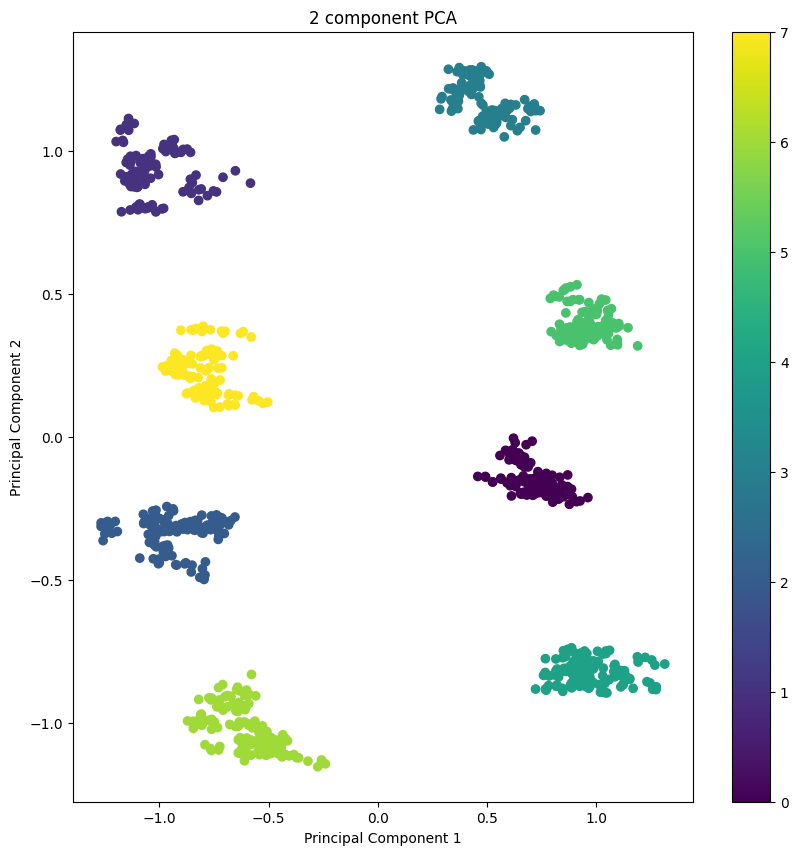

In [38]:
# Plot the PCA-transformed data
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_pca['principal component 1'], data_pca['principal component 2'], c=data_pca['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.colorbar(scatter)
plt.show()

In [39]:
# Calculate the silhouette score
silhouette = silhouette_score(data_pca[['principal component 1', 'principal component 2']], data_pca['cluster'])
print('Silhouette Score: ', silhouette)

Silhouette Score:  0.7682209605744974


## Agglomerative Clustering

1. This is a type of hierarchical clustering method that builds a hierarchy of clusters by successively merging or splitting existing clusters. 
2. Agglomerative clustering starts with each data point as its own cluster and merges the closest pair of clusters in each step. This process continues until all points are in a single cluster. The result can be represented as a dendrogram, a tree-like diagram that shows the order of merges and the similarity level at which they occurred. Unlike K-means, hierarchical clustering does not require specifying the number of clusters a priori and can discover clusters of arbitrary shape.

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Perform PCA again
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Transform the data
data_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=8)
agg_clusters = agg_clustering.fit_predict(data_pca)

# Add the cluster assignments to the data
data_pca['agg_cluster'] = agg_clusters


In [25]:

# Calculate the silhouette score
silhouette = silhouette_score(data_pca[['principal component 1', 'principal component 2']], data_pca['agg_cluster'])
print('Silhouette Score for Agglomerative Clustering: ', silhouette)

Silhouette Score for Agglomerative Clustering:  0.7682209605762977


## Fuzzy C-means Clustering

1. This is a type of fuzzy clustering method that allows data points to belong to multiple clusters with varying degrees of membership. The algorithm minimizes a weighted sum of squared distances from data points to cluster centers, where the weights are the membership degrees. 
2. Like K-means, it starts with random initial cluster centers and iteratively updates the cluster memberships and the cluster centers. The fuzziness of the clustering can be controlled by a parameter m; larger m results in fuzzier clustering. Fuzzy C-means can provide more nuanced clustering results than K-means or hierarchical clustering, especially when clusters are overlapping or intertwined.

In [26]:
# Perform PCA again
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Transform the data
data_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Perform Fuzzy C-means Clustering
fcm = fuzz.cluster.cmeans(data_pca[['principal component 1', 'principal component 2']].T, c=8, m=2, error=0.005, maxiter=1000)

# Get the cluster assignments
fcm_clusters = np.argmax(fcm[1], axis=0)

# Add the cluster assignments to the data
data_pca['fcm_cluster'] = fcm_clusters


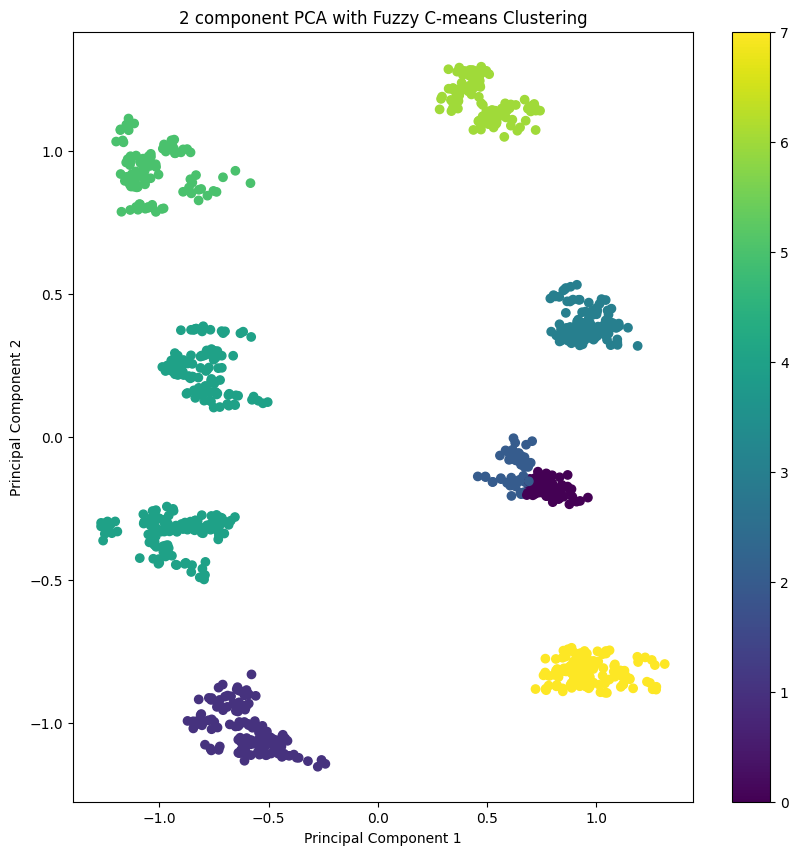

In [27]:

# Plot the PCA-transformed data
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_pca['principal component 1'], data_pca['principal component 2'], c=data_pca['fcm_cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA with Fuzzy C-means Clustering')
plt.colorbar(scatter)
plt.show()



In [28]:

# Calculate the silhouette score
silhouette = silhouette_score(data_pca[['principal component 1', 'principal component 2']], data_pca['fcm_cluster'])
print('Silhouette Score for Fuzzy C-means Clustering: ', silhouette)

Silhouette Score for Fuzzy C-means Clustering:  0.6856385929933448
